# Find confidence interval for Fare column with 95 % confidence interval
- using Z procedure
- using T Procedure

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [67]:
df = pd.concat([train_df.drop(columns='Survived'), test_df], ignore_index=True).sample(1309)

C:\Users\vinay\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

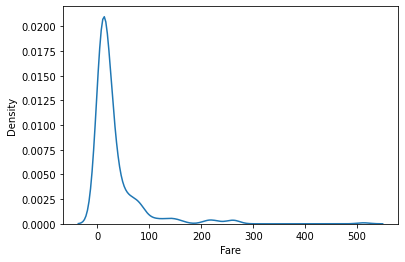

In [68]:
sns.kdeplot(x = 'Fare' , data = df)

In [69]:
# Using CLT
samples = []
stds = []
for i in range(10):
    x = df['Fare'].dropna().sample(31).values
    stds.append(x.std())
    samples.append(x.tolist())

In [70]:
samples = np.array(samples)

In [71]:
sampling_means = samples.mean(axis = 1)

C:\Users\vinay\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

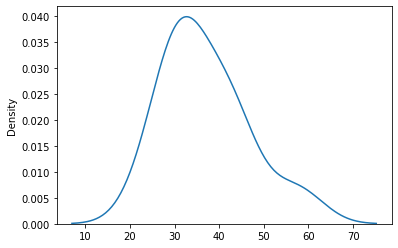

In [72]:
sns.kdeplot(sampling_means)

# Z Procedure

In [73]:
# in z procedure population std is known 

In [74]:
pop_std = df['Fare'].std() # <- population std
pop_std

51.758668239174185

Formula for z procedure
- CI = point estimate +- (Z(alpha/2) * (population std)/root(n))
- given : 1 - alpha = 0.95
- alpha = 0.05
- two tail therfore 0.05/2 => 0.025 area to the right .
- but z table tells area to the left -> therefore 1 - 0.025 =>0.975
- now look for z value where area is 0.975 which is 1.96
- therefore Z(alpha/2)or critical value is 1.96
- so formula is => point estimate +- (1.96 * (population std/root(n))

In [75]:
pnt_estimate = sampling_means.mean()

In [76]:
pnt_estimate 

36.91279677419355

In [77]:
lower_limit = pnt_estimate - 1.96*pop_std/np.sqrt(30)
upper_limit = pnt_estimate + 1.96*pop_std/np.sqrt(30)
print(f"{lower_limit} - {upper_limit}")

18.391195215392578 - 55.434398332994526


# T Procedure

In this population std is unknown therefore we will use sample std and t distribution value using t table , rather than Z table
- formula => CI = point estimate +- (T(alpha/2) * sample std/root(n))

In [78]:
pnt_estimate = sampling_means.mean()
sample_std = np.mean(stds)

- Number of samples are 30
- therefore degree of freedom -> 30 - 1 = 29 
- now look for value in t table where , degree of freedom is 29 and condfidence level is 95% , that is the critical value t(alpha/2)

In [79]:
lower_limit = sampling_means.mean() - 2.043*sample_std/np.sqrt(30)
upper_limit = sampling_means.mean()  + 2.043*sample_std/np.sqrt(30)

In [80]:
print(f"{lower_limit} - {upper_limit}")

19.048249796299352 - 54.77734375208775
